In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln
from numpy import exp
from scipy.special import factorial
import scipy.optimize as spo 
import os
import math
from itertools import zip_longest
from itertools import combinations_with_replacement
from itertools import permutations
from datetime import datetime  
import time
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
import imageio

pasta = os.path.abspath('Experimental_data') 
my_path = os.getcwd() +'/Comparison'
data = {}
R= 8.31/1000 #[kJ/mol]


def s0(T):
        if T !=0:
            t=T/1000
            A = 33.066178
            B = -11.363417
            C = 11.432816
            D = -2.772874
            E = -0.158558
            G = 172.707974
            S0 = A*ln(t) + B*t + C*(t**2)/2 + D*(t**3)/3 - E/(2*t**2) + G # Hydrogen standard entropy J/mol of H2- NIST
            S0 = S0/1000 #kJ/mol of H2
            return S0
        else:
            return 0          
        
        
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier


In [2]:
###################################### SIMULATION TETRAHEDRAL BCC STRUCTURE  ########################3

####################################Separa os overlaped#######################

inicio_tot = time.time()
data_f_T_BCC ={}
neighbors = [np.sqrt(2)/4,1/2,np.sqrt(6)/4]
sites_occupied = {}
sites_blocked = {}
sites_available = {}
sites_overlaped = {}
for NN in neighbors:
    inicio = time.time()
    #data_f[lattice_param] ={}
    sites_i=np.zeros(3)
    sites_b=np.zeros(3)
    sites_o=np.zeros(3)
    #sites_b=np.array(sites_b)
    total_sites=[]
    sites_v_temp = []
    occupancy = {}
    sites_occupied[NN] = {}
    sites_blocked[NN] = {}
    sites_available[NN] = {}
    sites_overlaped[NN] = {}

    wyckoff_positions = []
    wyckoff_positions_1 = [0,1/2,1/4]
    wyckoff_positions_2=  [0,1/2,3/4]
    wyckoff_positions = wyckoff_positions+ list(permutations(wyckoff_positions_1,3)) + list(permutations(wyckoff_positions_2,3)) 
    wyckoff_positions = np.array(wyckoff_positions)
    sites_v_temp = wyckoff_positions
    x_cells = np.arange(5)
    y_cells = np.arange(5)
    z_cells = np.arange(5)
    for k in z_cells:
        for j in y_cells:
            for i in x_cells:
                if (i,j,k)!=(0,0,0):
                    sites_v_temp= np.append(sites_v_temp,wyckoff_positions+(i,j,k),axis=0)    


    total_sites = sites_v_temp
    sites_v_temp = np.array(sites_v_temp)
    while len(sites_v_temp)>0:
        idx = np.random.randint(0,len(sites_v_temp))
        sites_i = np.vstack((sites_i,np.array(sites_v_temp[idx])))
        actual_site = sites_v_temp[idx]
        sites_v_temp = np.delete(sites_v_temp,idx,axis=0)
        blocked_idx = np.argwhere(np.sqrt(np.sum((sites_v_temp-actual_site)**2,axis=1))<=NN)
        if np.ndim(sites_b)>1:
            overlaped_idx = np.argwhere(np.sqrt(np.sum((sites_b-actual_site)**2,axis=1))<=NN)
            if len(overlaped_idx)>0:
                overlaped = np.concatenate(np.take(sites_b,overlaped_idx,axis=0),axis=0)
                sites_o = np.vstack((sites_o,overlaped))  
                sites_b = np.delete(sites_b,overlaped_idx,axis=0)
        if len(blocked_idx)>0:
            blocked = np.concatenate(np.take(sites_v_temp,blocked_idx,axis=0),axis=0)
            sites_b = np.vstack((sites_b,blocked))
            sites_v_temp= np.delete(sites_v_temp,blocked_idx,axis=0)
        occupancy[len(sites_i[1:])/len(total_sites)] = [len(sites_b[1:])/len(total_sites),len(sites_v_temp)/len(total_sites)]
        sites_occupied[NN][len(sites_i[1:])/len(total_sites)]= sites_i[1:]
        sites_blocked[NN][len(sites_i[1:])/len(total_sites)]= sites_b[1:]
        sites_available[NN][len(sites_i[1:])/len(total_sites)]= sites_v_temp
        if np.ndim(sites_o)>1:
            sites_overlaped[NN][len(sites_i[1:])/len(total_sites)]= sites_o[1:]
        else:
            sites_overlaped[NN][len(sites_i[1:])/len(total_sites)]= np.array([])
        

    f_i = list(occupancy.keys())
    f_b = [occupancy[f_i][0] for f_i in occupancy.keys() ]
    f_v= [occupancy[f_i][1] for f_i in occupancy.keys() ]
    print(NN,len(total_sites),len(sites_i[1:]),len(sites_b[1:]),len(sites_v_temp), len(sites_i[1:])+len(sites_b[1:]))
    data_f_T_BCC[NN]=[f_i,f_b,f_v,sites_i,sites_b,total_sites]
    fim = time.time()

    tempo_decorrido = fim - inicio
    print("Iteration time:", tempo_decorrido/60, "minutes")

    
total_sites_blocked={}
for NN in neighbors:
    total_sites_blocked[NN]={}
for cH in sites_blocked[NN].keys():
    if len(sites_overlaped[NN][cH])>0:
        total_sites_blocked[NN][cH]= np.concatenate((sites_blocked[NN][cH],sites_overlaped[NN][cH]),axis=0)
    else:
        total_sites_blocked[NN][cH]=sites_blocked[NN][cH]    

fim_tot = time.time()

tempo_decorrido = fim_tot - inicio_tot
print("Total time:", tempo_decorrido/60, "minutes")

0.3535533905932738 1500 566 256 0 822
Iteration time: 0.0012937704722086588 minutes
0.5 1500 356 423 0 779
Iteration time: 0.0008660356203715006 minutes
0.6123724356957945 1500 240 284 0 524
Iteration time: 0.0006748676300048828 minutes
Total time: 0.0029093464215596515 minutes


In [5]:
#OCCUPIED SITES

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio


for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    # Função para criar os frames
    def create_frame(t):
        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]



        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        ax.scatter(x, y, z, c='b', marker='o',s=50)
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {round(t*len(total_sites))} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

    # Lista para armazenar os frames
    frames = []

    # Criar e salvar os frames como imagens separadas
    for t in list(sites_occupied[NN])[::20]:
        fig = create_frame(t)
        filename = f'frame_{t:.3f}.png'
        fig.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close(fig)

    # Combinar os frames em um arquivo GIF
    fps=2
    imageio.mimsave(f'animation_occupied_nb{JMAK_nb}.gif', frames,duration=1000/fps)  # Altere a duração conforme necessário

    # Remover as imagens salvas
    import os
    for filename in os.listdir():
        if filename.startswith('frame_') and filename.endswith('.png'):
            os.remove(filename)


/tmp/ipykernel_18195/282708350.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


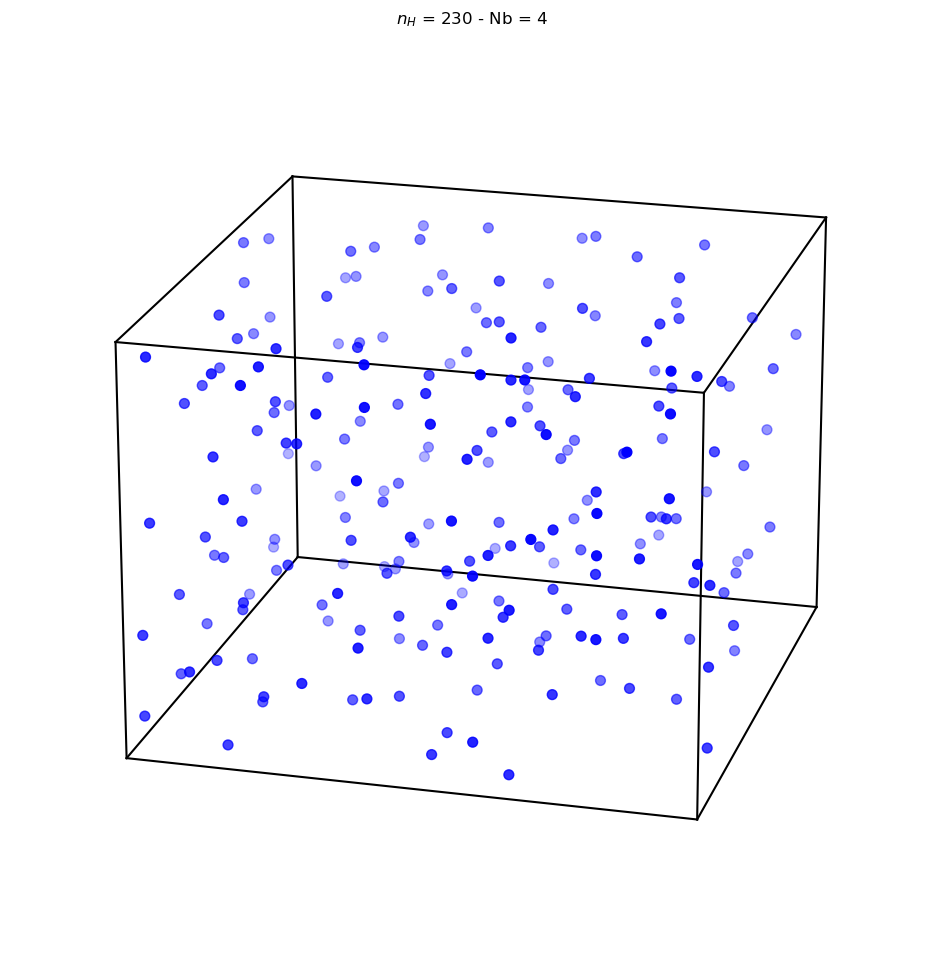

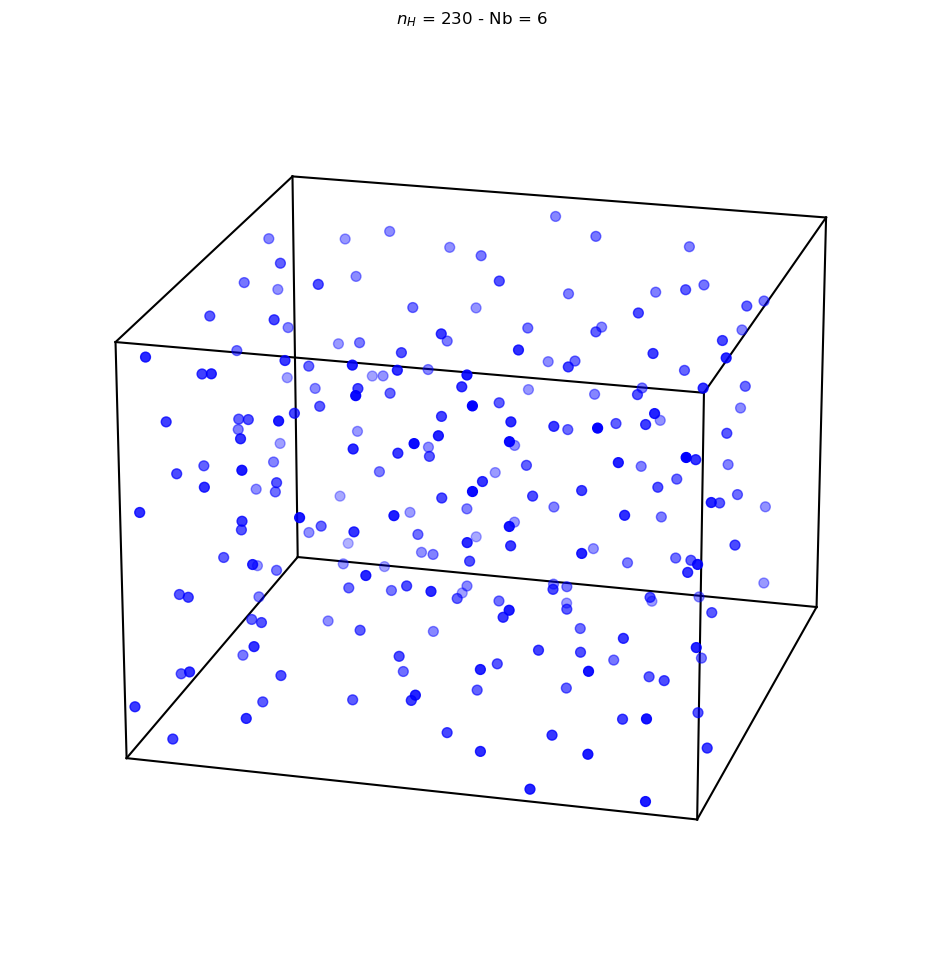

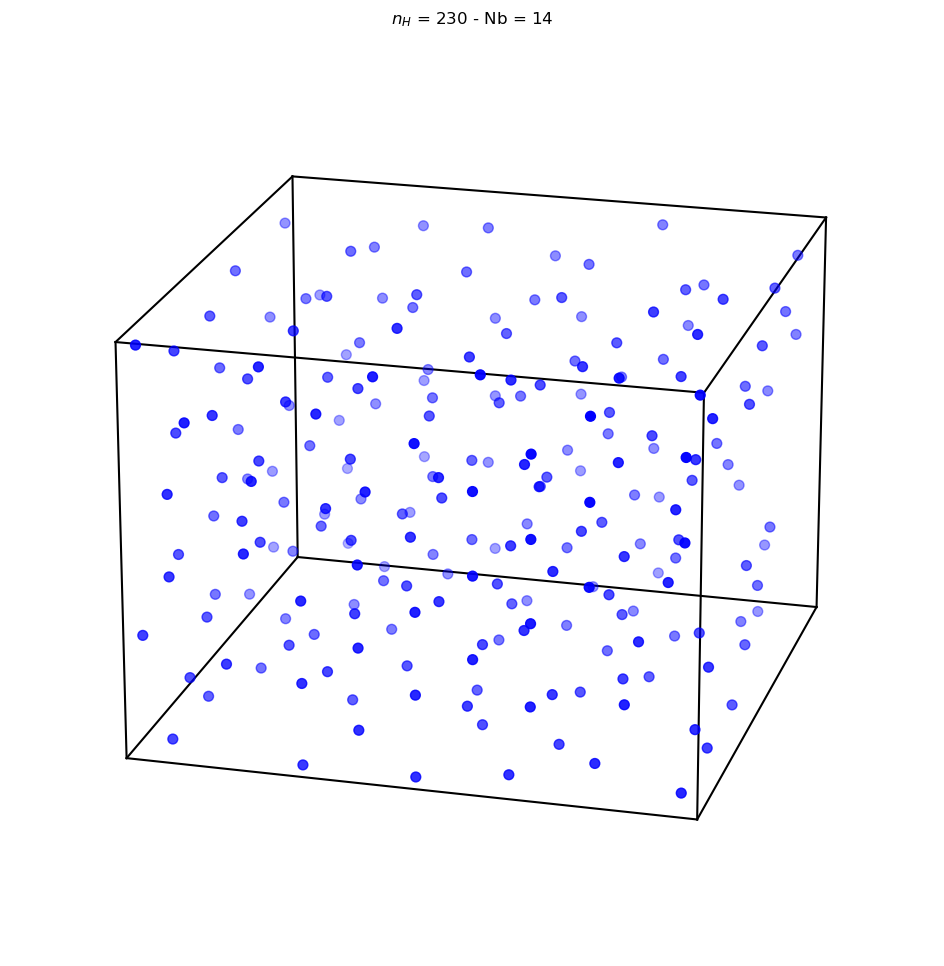

In [7]:
#OCCUPIED SITES - save frames

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio


for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    # Função para criar os frames
    def create_frame(t):
        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        ax.scatter(x, y, z, c='b', marker='o',s=50)
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {nh} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

    # Lista para armazenar os frames
    frames = []
    nh= 230
    # Criar e salvar os frames como imagens separadas
    t= list(sites_occupied[NN])[nh-1]
    fig = create_frame(t)
    filename = f'occupied_Nb{JMAK_nb}_{nh:.3f}.png'
    fig.savefig(filename)

    

In [9]:
#BLOCKED SITES
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    # Função para criar os frames
    def create_frame(t):
        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]


        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        ax.scatter(x, y, z, c='red', marker='o',s=50)
        
        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)
            
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {round(t*len(total_sites))} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

    # Lista para armazenar os frames
    frames = []

    # Criar e salvar os frames como imagens separadas
    for t in list(sites_occupied[NN])[::20]:
        fig = create_frame(t)
        filename = f'frame_{t:.3f}.png'
        fig.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close(fig)

    # Combinar os frames em um arquivo GIF
    fps=2
    imageio.mimsave(f'animation_blocked_nb{JMAK_nb}.gif', frames,duration=1000/fps)  # Altere a duração conforme necessário

    # Remover as imagens salvas
    import os
    for filename in os.listdir():
        if filename.startswith('frame_') and filename.endswith('.png'):
            os.remove(filename)


/tmp/ipykernel_18195/1965863880.py:81: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


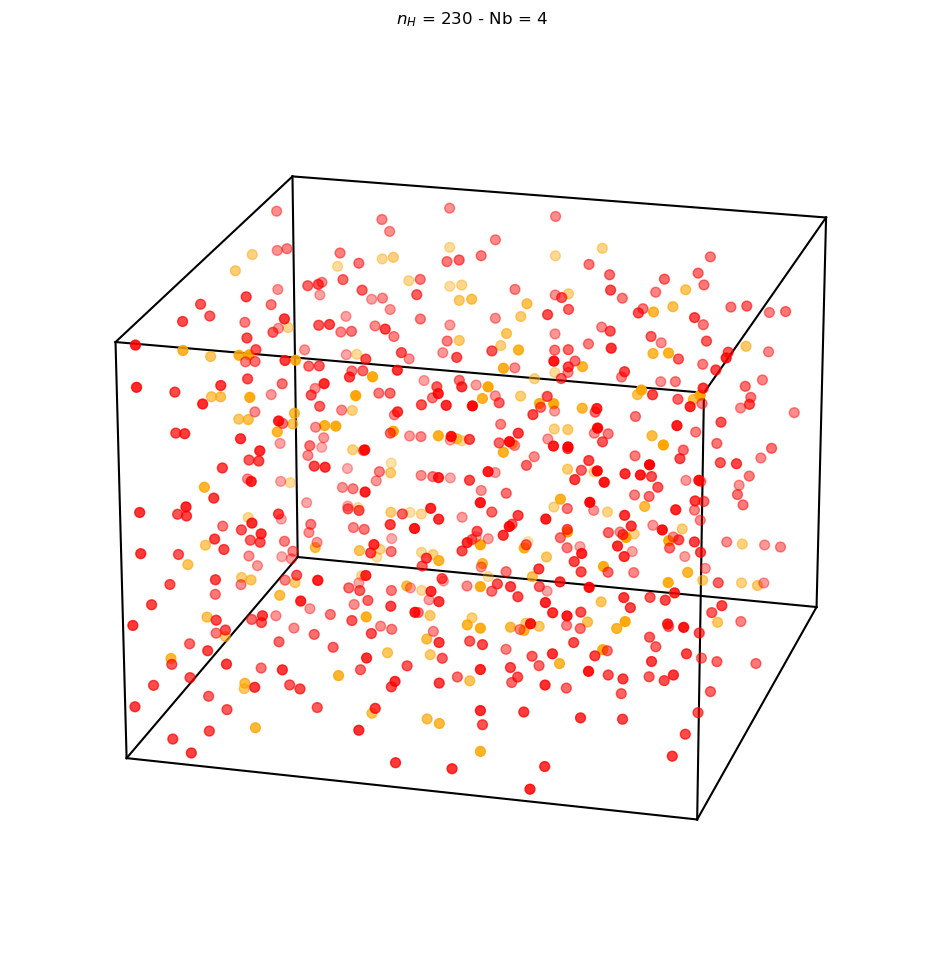

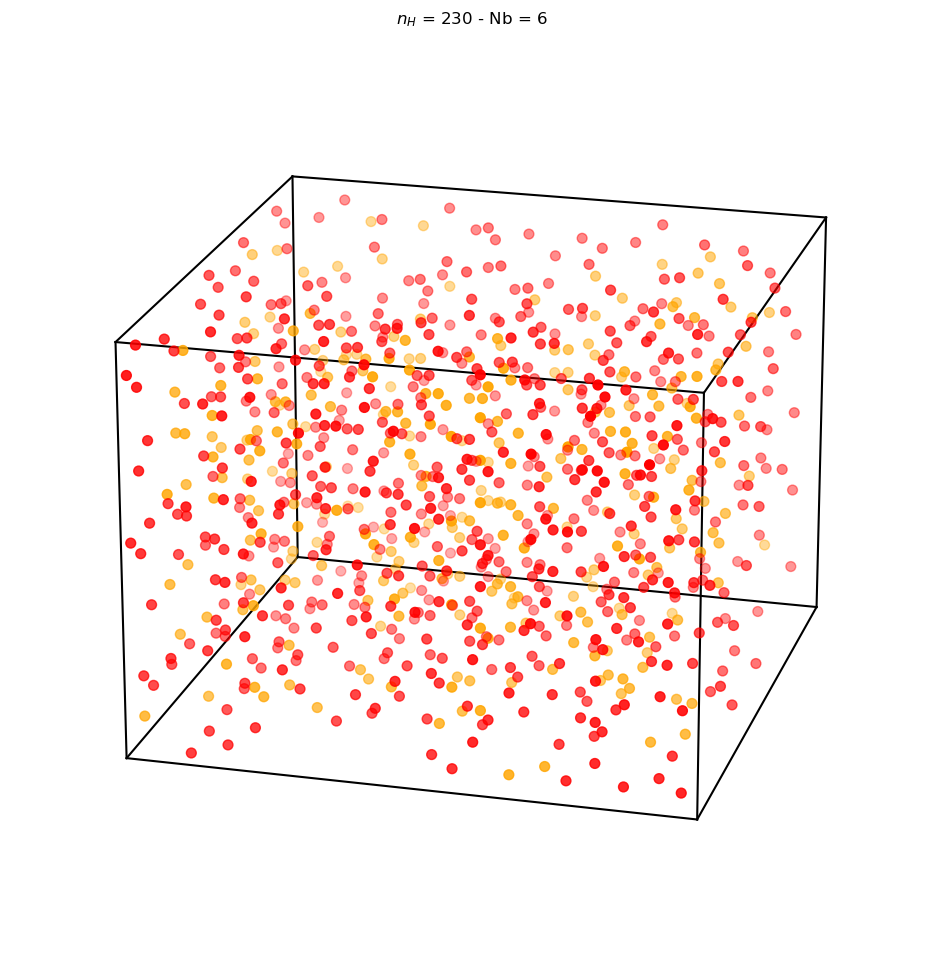

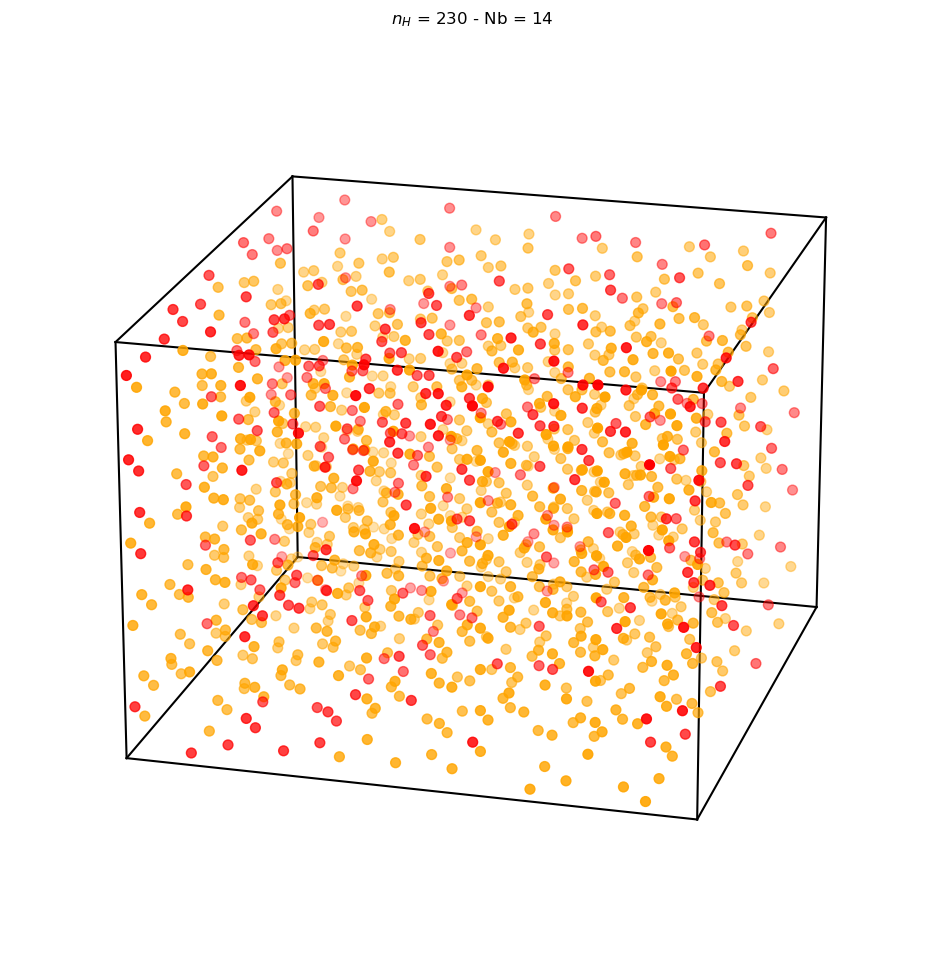

In [10]:
#BLOCKED SITES - save frames

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio


for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    # Função para criar os frames
    def create_frame(t):
        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]


        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        ax.scatter(x, y, z, c='red', marker='o',s=50)
        
        
        
        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)    
            
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {nh} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig
    # Lista para armazenar os frames
    frames = []
    nh=230
    # Criar e salvar os frames como imagens separadas
    t= list(sites_occupied[NN])[nh-1]
    fig = create_frame(t)
    filename = f'blocked_Nb{JMAK_nb}_{nh:.3f}.png'
    fig.savefig(filename)



In [11]:
#AVAILABLE SITES


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

for NN in neighbors:
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14


        # Função para criar os frames
        def create_frame(t):
            x=sites_available[NN][t][0:,0]
            y=sites_available[NN][t][0:,1]
            z=sites_available[NN][t][0:,2]


            # Define the vertices of the cube
            vertices = [
                [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
                [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
            ]

            # Define the edges of the cube
            edges = [
                [0, 1], [1, 2], [2, 3], [3, 0],
                [4, 5], [5, 6], [6, 7], [7, 4],
                [0, 4], [1, 5], [2, 6], [3, 7]
            ]



            fig = plt.figure(figsize=(14, 12))
            ax = fig.add_subplot( projection='3d')

            # Hide the axis lines
            ax._axis3don = False

            for edge in edges:
                ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                        [vertices[edge[0]][1], vertices[edge[1]][1]],
                        [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

            # Remove background
            ax.set_facecolor('none')
            # Plote os pontos
            ax.scatter(x, y, z, c='green', marker='o',s=50)
            #nh=t*len(total_sites)
            # Personalize os rótulos dos eixos
            ax.set_title(f'$n_H$ = {round(t*len(total_sites))} - Nb = {JMAK_nb}')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_xlim3d(0,len(x_cells)) 
            ax.set_ylim3d(0,len(y_cells))
            ax.set_zlim3d(0,len(z_cells))
            ax.view_init(elev=20, azim=15)
            return fig

    # Lista para armazenar os frames
    frames = []

    # Criar e salvar os frames como imagens separadas
    for t in list(sites_occupied[NN])[::20]:
        fig = create_frame(t)
        filename = f'frame_{t:.3f}.png'
        fig.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close(fig)

    # Combinar os frames em um arquivo GIF
    fps=2
    imageio.mimsave(f'animation_available_nb{JMAK_nb}.gif', frames,duration=1000/fps)  # Altere a duração conforme necessário

    # Remover as imagens salvas
    import os
    for filename in os.listdir():
        if filename.startswith('frame_') and filename.endswith('.png'):
            os.remove(filename)


/tmp/ipykernel_18195/2879077960.py:75: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


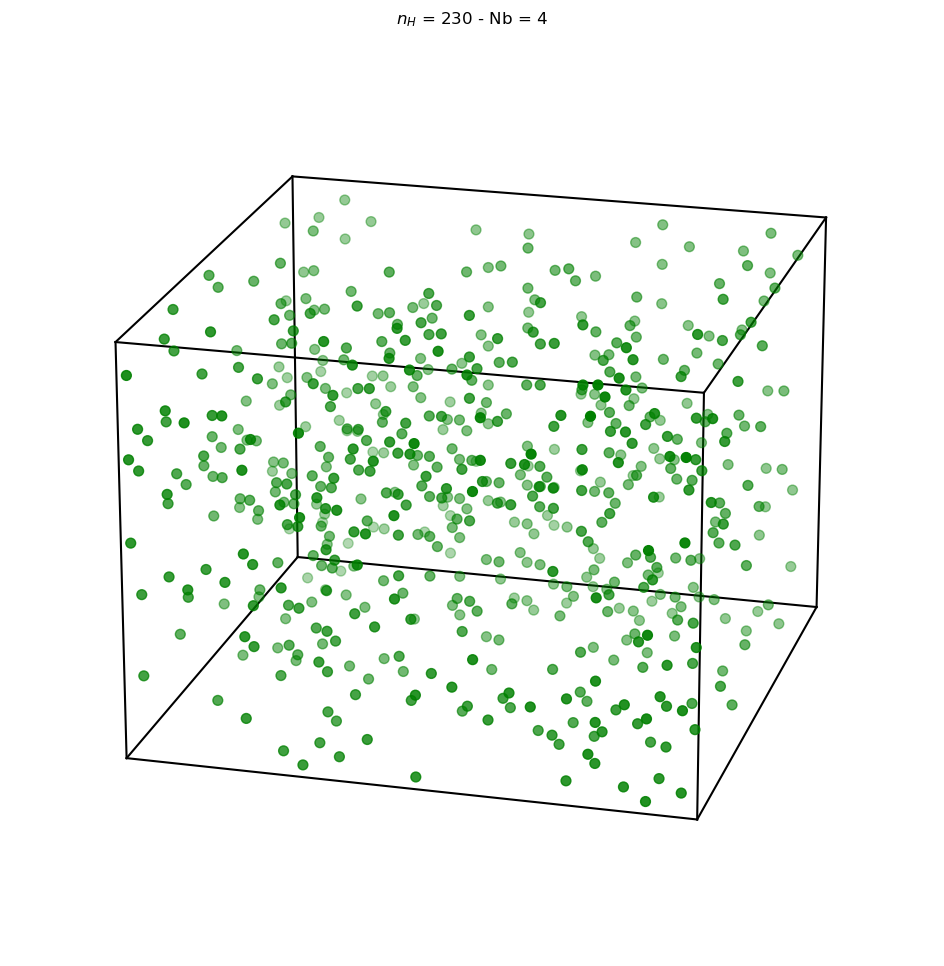

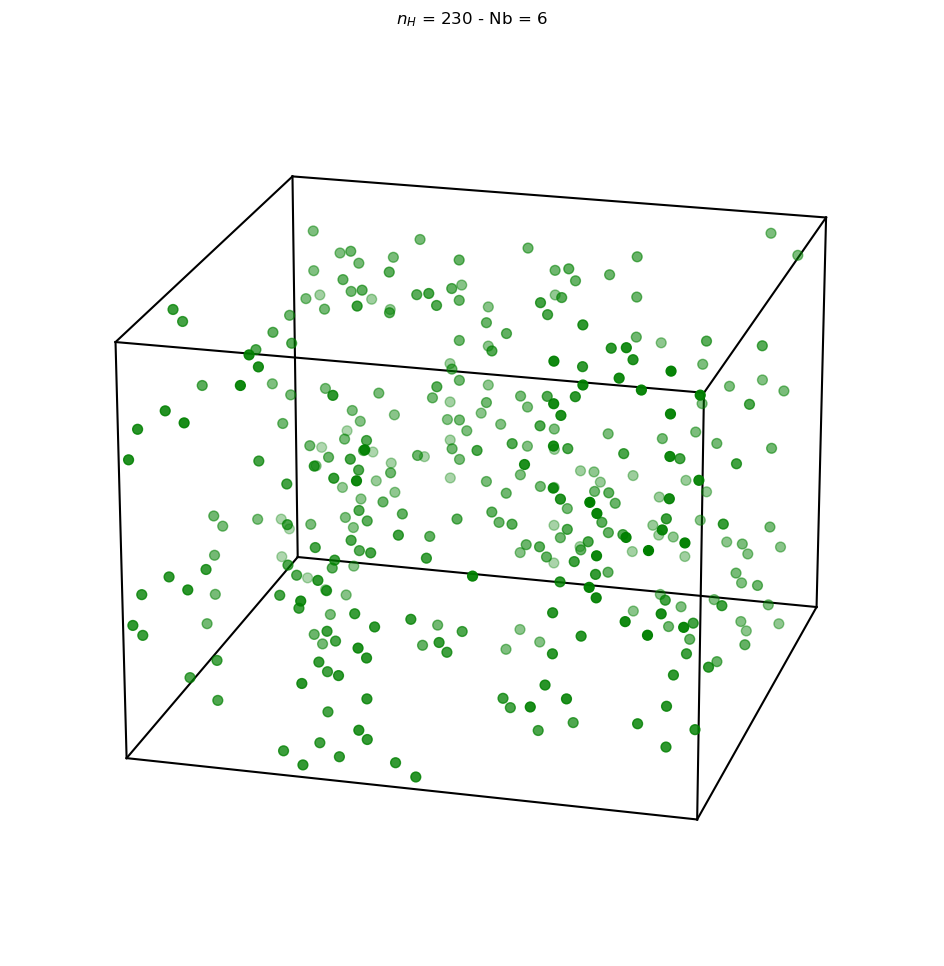

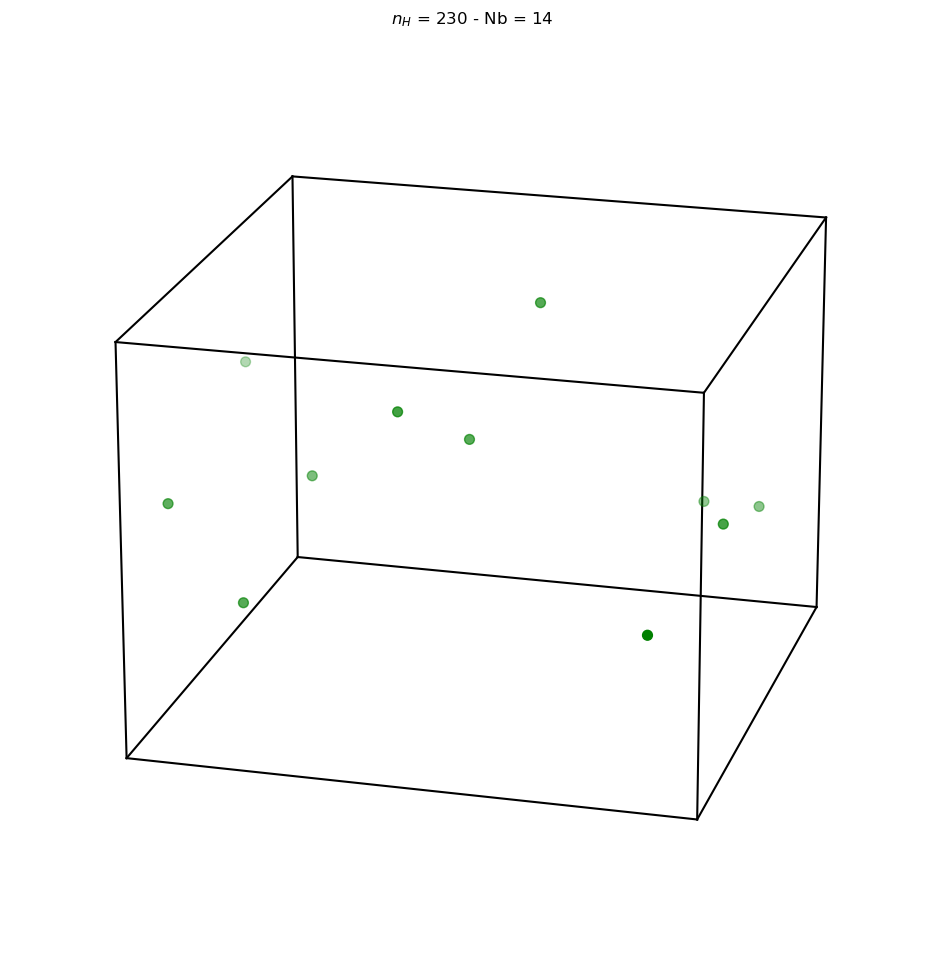

In [12]:
#Available SITES - save frames

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio


for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14

    # Função para criar os frames
    def create_frame(t):
        x=sites_available[NN][t][0:,0]
        y=sites_available[NN][t][0:,1]
        z=sites_available[NN][t][0:,2]


        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        ax.scatter(x, y, z, c='green', marker='o',s=50)
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {nh} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

    # Lista para armazenar os frames
    frames = []
    nh=230
    # Criar e salvar os frames como imagens separadas
    t= list(sites_occupied[NN])[nh-1]
    fig = create_frame(t)
    filename = f'available_Nb{JMAK_nb}_{nh:.3f}.png'
    fig.savefig(filename)

    

In [13]:
#All SITES


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

for NN in neighbors:

    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14


    # Função para criar os frames
    def create_frame(t):



        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Plote os pontos
        x=sites_available[NN][t][0:,0]
        y=sites_available[NN][t][0:,1]
        z=sites_available[NN][t][0:,2]
        ax.scatter(x, y, z, c='green', marker='o',s=50, alpha=0.2)

        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]

        ax.scatter(x, y, z, c='red', marker='o',s=60)

        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        ax.scatter(x, y, z, c='blue', marker='o',s=60)
        
        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)    
            
        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {round(t*len(total_sites))} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig


    # Lista para armazenar os frames
    frames = []

    # Criar e salvar os frames como imagens separadas
    for t in list(sites_occupied[NN])[::20]:
        fig = create_frame(t)
        filename = f'frame_allsites_{t:.3f}.png'
        fig.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close(fig)

    # Combinar os frames em um arquivo GIF
    fps=2
    imageio.mimsave(f'animation_allsites_nb{JMAK_nb}.gif', frames,duration=1000/fps)  # Altere a duração conforme necessário

    # Remover as imagens salvas
    import os
    for filename in os.listdir():
        if filename.startswith('frame_') and filename.endswith('.png'):
            os.remove(filename)


/tmp/ipykernel_18195/3536565963.py:99: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


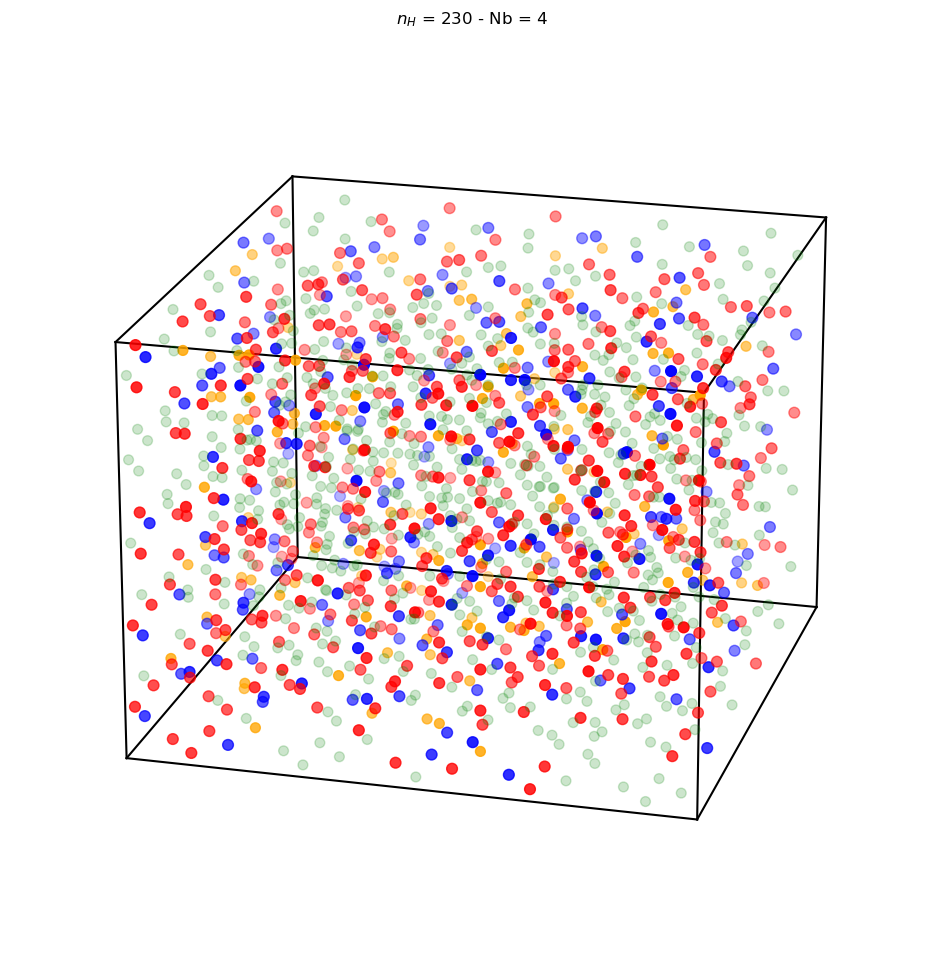

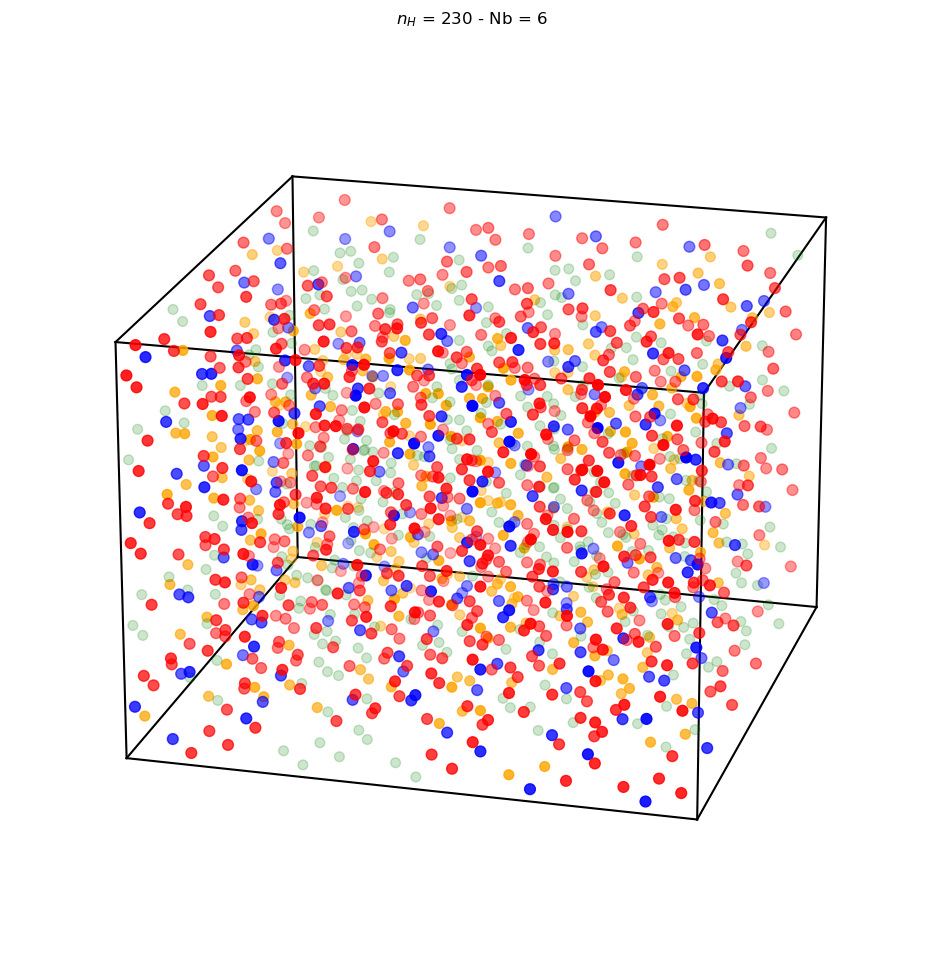

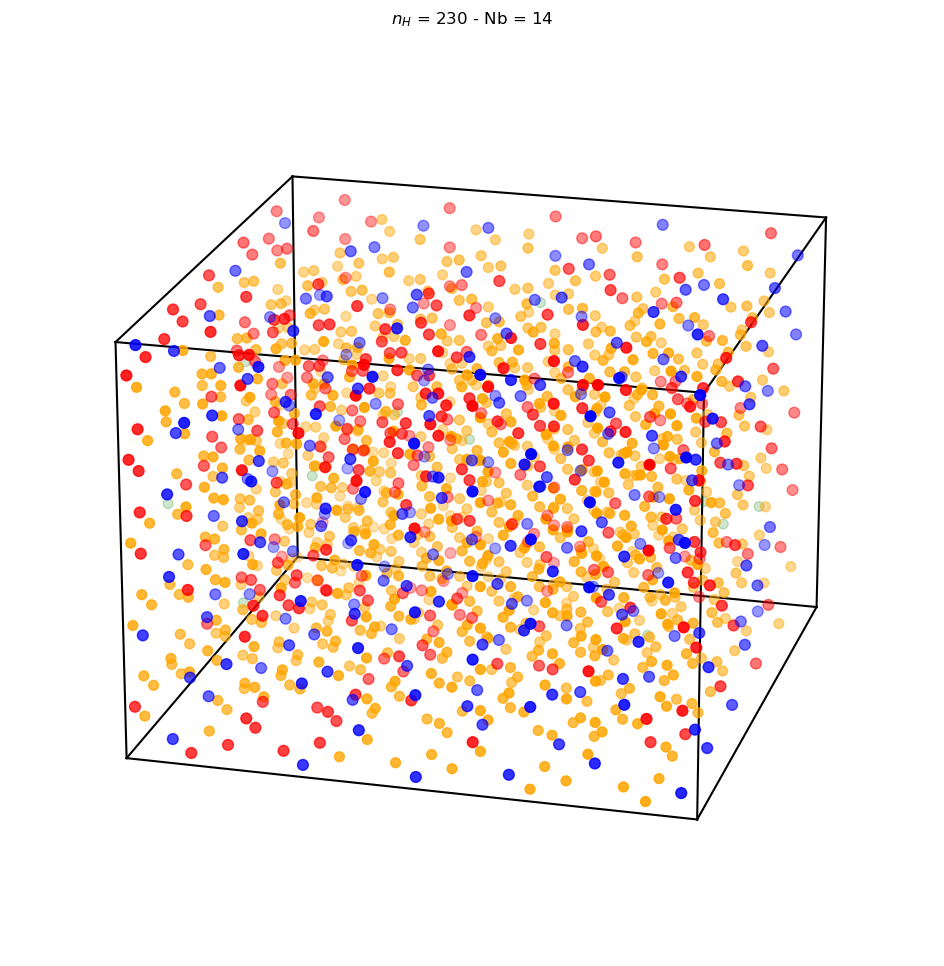

In [14]:
#All SITES - save frame


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
for NN in neighbors:
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14


    # Função para criar os frames
    def create_frame(t):



        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        # Plote os pontos
        x=sites_available[NN][t][0:,0]
        y=sites_available[NN][t][0:,1]
        z=sites_available[NN][t][0:,2]
        ax.scatter(x, y, z, c='green', marker='o',s=50,alpha=0.2)

        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]

        ax.scatter(x, y, z, c='red', marker='o',s=60)

        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        ax.scatter(x, y, z, c='blue', marker='o',s=60)
        
        

        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)    
            
            
        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {nh} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig



# Criar e salvar os frames como imagens separadas
    nh=230
    # Criar e salvar os frames como imagens separadas
    t= list(sites_occupied[NN])[nh-1]
    fig = create_frame(t)
    filename = f'allsites_Nb{JMAK_nb}_{nh:.3f}.png'
    fig.savefig(filename)



In [15]:
#All SITES block / occupied


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
for NN in neighbors:
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14


    # Função para criar os frames
    def create_frame(t):

        # Plote os pontos

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]

        ax.scatter(x, y, z, c='red', marker='o',s=50)

        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        ax.scatter(x, y, z, c='blue', marker='o',s=50)
        
        
        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)    
            
        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {round(t*len(total_sites))} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

    # Lista para armazenar os frames
    frames = []

    # Criar e salvar os frames como imagens separadas
    for t in list(sites_occupied[NN])[::20]:
        fig = create_frame(t)
        filename = f'frame_ocup_block_{t:.3f}.png'
        fig.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close(fig)

    # Combinar os frames em um arquivo GIF
    fps=2
    imageio.mimsave(f'animation_ocup_block_nb{JMAK_nb}.gif', frames,duration=1000/fps)  # Altere a duração conforme necessário

    # Remover as imagens salvas
    import os
    for filename in os.listdir():
        if filename.startswith('frame_') and filename.endswith('.png'):
            os.remove(filename)


/tmp/ipykernel_18195/2803196604.py:91: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


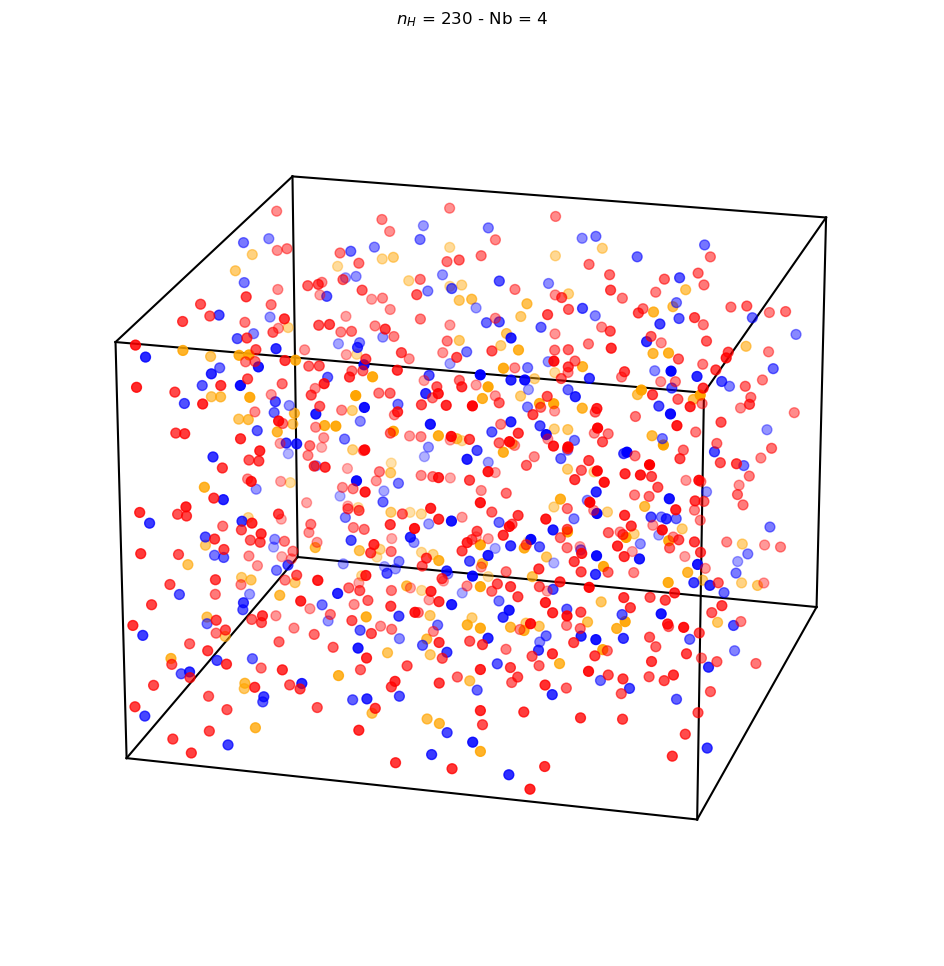

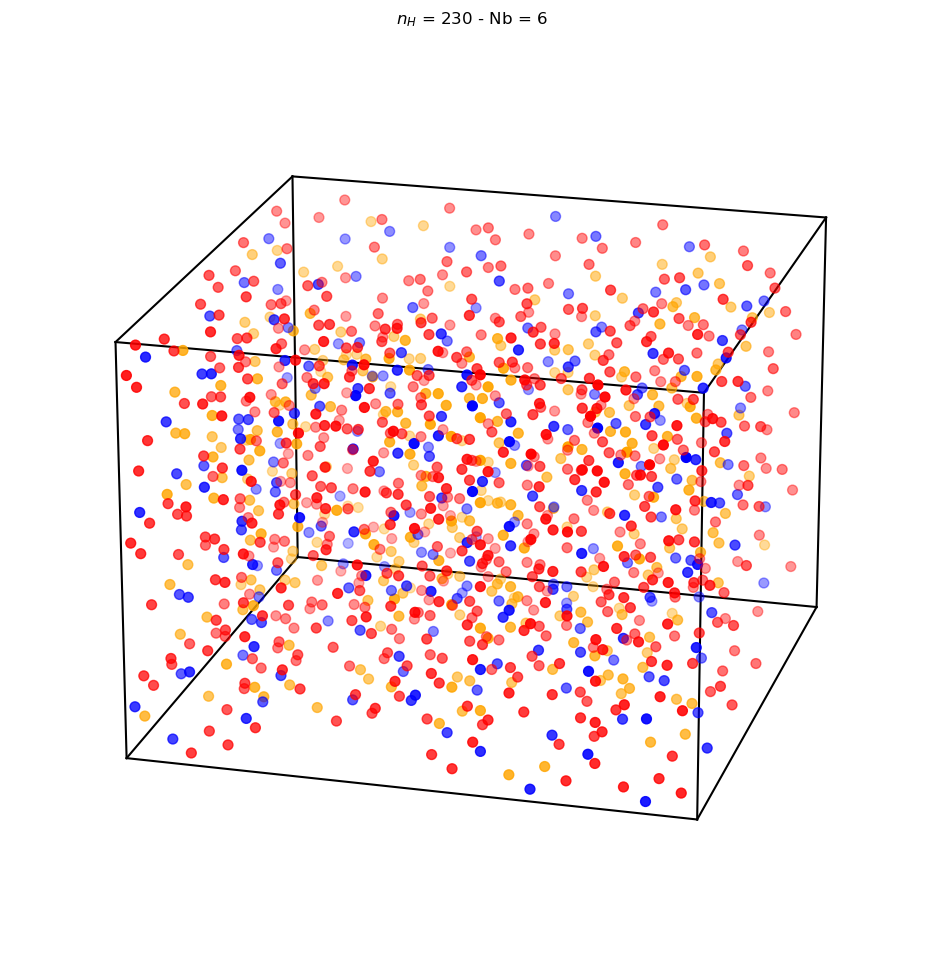

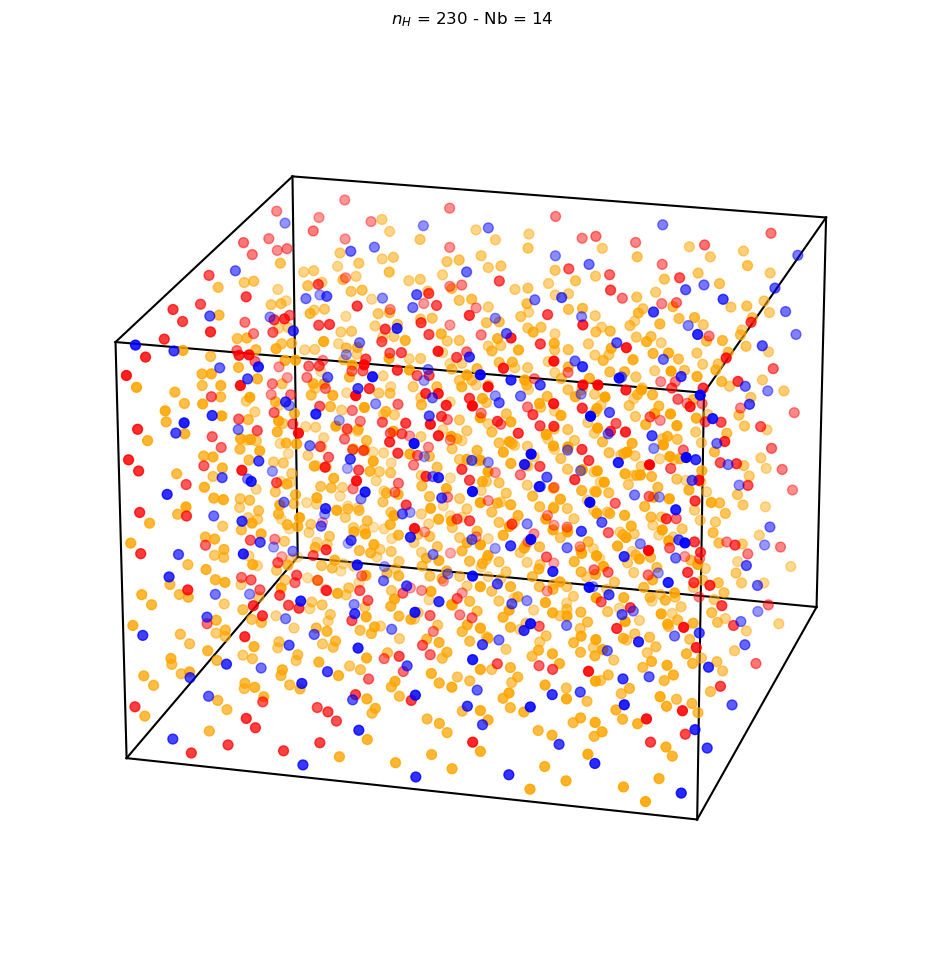

In [16]:
#All SITES block / occupied


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
for NN in neighbors:
    if NN==np.sqrt(2)/4:
        JMAK_nb=4 #nb = 2
    if NN==1/2:
        JMAK_nb = 6 # nb = 4
    if NN==np.sqrt(6)/4:
        JMAK_nb= 14


    # Função para criar os frames
    def create_frame(t):

        # Plote os pontos

        fig = plt.figure(figsize=(14, 12))
        ax = fig.add_subplot( projection='3d')

        x=sites_blocked[NN][t][0:,0]
        y=sites_blocked[NN][t][0:,1]
        z=sites_blocked[NN][t][0:,2]

        ax.scatter(x, y, z, c='red', marker='o',s=50)

        x=sites_occupied[NN][t][0:,0]
        y=sites_occupied[NN][t][0:,1]
        z=sites_occupied[NN][t][0:,2]

        ax.scatter(x, y, z, c='blue', marker='o',s=50)
        
        
        if len(sites_overlaped[NN][t])>2:
            x=sites_overlaped[NN][t][0:,0]
            y=sites_overlaped[NN][t][0:,1]
            z=sites_overlaped[NN][t][0:,2]
            cor = 'orange'
            ax.scatter(x, y, z, edgecolor = cor,c=cor, marker='o',s=50)    
        
   
        
        # Define the vertices of the cube
        vertices = [
            [0, 0, 0], [len(x_cells), 0, 0], [len(x_cells), len(y_cells), 0], [0, len(y_cells), 0],
            [0, 0, len(z_cells)], [len(x_cells), 0, len(z_cells)], [len(x_cells), len(y_cells), len(z_cells)], [0, len(y_cells), len(z_cells)]
        ]

        # Define the edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]
        
        

        # Hide the axis lines
        ax._axis3don = False

        for edge in edges:
            ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                    [vertices[edge[0]][1], vertices[edge[1]][1]],
                    [vertices[edge[0]][2], vertices[edge[1]][2]], color='black')

        # Remove background
        ax.set_facecolor('none')
        # Plote os pontos
        #nh=t*len(total_sites)
        # Personalize os rótulos dos eixos
        ax.set_title(f'$n_H$ = {nh} - Nb = {JMAK_nb}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim3d(0,len(x_cells)) 
        ax.set_ylim3d(0,len(y_cells))
        ax.set_zlim3d(0,len(z_cells))
        ax.view_init(elev=20, azim=15)
        return fig

# Criar e salvar os frames como imagens separadas
    nh=230
    # Criar e salvar os frames como imagens separadas
    t= list(sites_occupied[NN])[nh-1]
    fig = create_frame(t)
    filename = f'ocup_block_Nb{JMAK_nb}_{nh:.3f}.png'
    fig.savefig(filename)

